Embedding+KMeans Clustering

In [1]:
%pip install pandas sentence-transformers scikit-learn matplotlib requests

Note: you may need to restart the kernel to use updated packages.


Embedding all the addresses 

In [2]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load data
df = pd.read_csv("output_cleaned.csv")
addresses = df['address'].fillna('').astype(str).tolist()

# Load model and embed
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
embeddings = model.encode(addresses, show_progress_bar=True)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/115 [00:00<?, ?it/s]

Cluster With KMeans

In [7]:
from sklearn.cluster import KMeans

num_clusters = 5  # you can tune this later
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings)


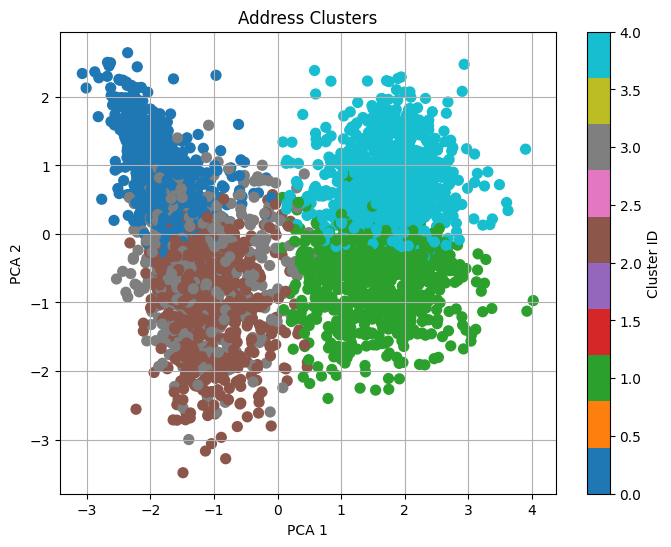

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=df['Cluster'], cmap='tab10', s=50)
plt.title("Address Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()


In [9]:
df.to_csv("clustered_addresses.csv", index=False)